<a href="https://colab.research.google.com/github/Annamdevula1/BANK-_-Fraud-/blob/main/DURGA_PRASAD_ipynb1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

np.random.seed(42)
n = 5000

data = {
    "Transaction_Amount": np.random.randint(100, 100000, n),
    "Transaction_Time": np.random.randint(0, 24, n),
    "Location_Change": np.random.choice([0,1], n),
    "Device_Change": np.random.choice([0,1], n),
    "Previous_Fraud_Count": np.random.randint(0, 3, n)
}

df = pd.DataFrame(data)

df["Is_Fraud"] = np.where(
    ((df["Transaction_Amount"] > 60000) & (df["Transaction_Time"] < 6)) |
    ((df["Location_Change"] == 1) & (df["Previous_Fraud_Count"] > 0)),
    1, 0
)

In [ ]:
X = df.drop("Is_Fraud", axis=1)
y = df["Is_Fraud"]

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

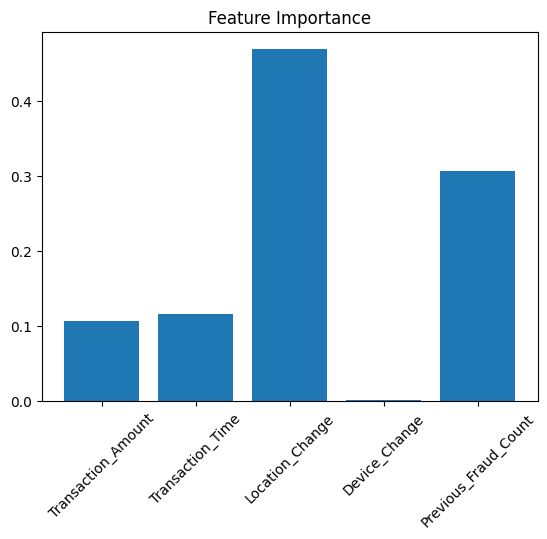

In [ ]:
import matplotlib.pyplot as plt

importances = model.feature_importances_
features = X.columns

plt.figure()
plt.bar(features, importances)
plt.xticks(rotation=45)
plt.title("Feature Importance")
plt.show()